<a href="https://colab.research.google.com/github/tanjummotin/Preprocessing-and-visualization-Task/blob/main/Markopolo_ai_assessment_winequality_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###To run this file, at first the winequality-white.csv file need to be uploaded.

In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

import seaborn as sns
from time import time

In [2]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Display first few records
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.shape


(4898, 12)

##Remove duplicate entries from the dataset using Python

In [7]:
# Drop duplicate rows from the DataFrame
data = data.drop_duplicates()

In [8]:
data.shape

(3961, 12)

In [9]:
# Find the number of duplicate entries
duplicate_count = data.duplicated().sum()

# Print the result
print("Number of duplicate entries:", duplicate_count)

Number of duplicate entries: 0


##Handle missing values appropriately (e.g., impute, drop, or interpolate) using Python

In [10]:
data.tail(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4867,5.3,0.600,0.34,1.40,0.031,3.0,60.0,0.98854,3.27,0.38,13.000000,6
4868,5.8,0.230,0.31,4.50,0.046,42.0,124.0,0.99324,3.31,0.64,10.800000,6
4869,6.6,0.240,0.33,10.10,0.032,8.0,81.0,0.99626,3.19,0.51,9.800000,6
4870,6.1,0.320,0.28,6.60,0.021,29.0,132.0,0.99188,3.15,0.36,11.450000,7
4871,5.0,0.200,0.40,1.90,0.015,20.0,98.0,0.98970,3.37,0.55,12.050000,6
4872,6.0,0.420,0.41,12.40,0.032,50.0,179.0,0.99622,3.14,0.60,9.700000,5
4873,5.7,0.210,0.32,1.60,0.030,33.0,122.0,0.99044,3.33,0.52,11.900000,6
4874,5.6,0.200,0.36,2.50,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,6
4875,7.4,0.220,0.26,1.20,0.035,18.0,97.0,0.99245,3.12,0.41,9.700000,6
4876,6.2,0.380,0.42,2.50,0.038,34.0,117.0,0.99132,3.36,0.59,11.600000,7


In [11]:
rows_with_missing_values = data.isnull().sum(axis=1).astype(bool).sum()

# Print the result
print("Number of rows with missing values:", rows_with_missing_values)

Number of rows with missing values: 0


###There is no missing values. That's why i didn't use any techniques.

###Remove outliers or noisy data points that may impact the analysis using Python.

In [12]:
data['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [13]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "quality"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75)

print(Q1,Q3)

# Select and Calculate outlier range using interquartile range
outlier_range = 1.5 * (Q3 - Q1)

# Outliers in data
num_data = data[((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

5.0 6.0
Number of outliers removed:  156


In [14]:
data.shape

(3805, 12)

In [15]:
data['quality'].value_counts()



6    1788
5    1175
7     689
4     153
Name: quality, dtype: int64

#Data Visualization

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3805 non-null   float64
 1   volatile acidity      3805 non-null   float64
 2   citric acid           3805 non-null   float64
 3   residual sugar        3805 non-null   float64
 4   chlorides             3805 non-null   float64
 5   free sulfur dioxide   3805 non-null   float64
 6   total sulfur dioxide  3805 non-null   float64
 7   density               3805 non-null   float64
 8   pH                    3805 non-null   float64
 9   sulphates             3805 non-null   float64
 10  alcohol               3805 non-null   float64
 11  quality               3805 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 356.8 KB


In [17]:
#Count the number of unique values
print(data["quality"].unique())
print(type(data["quality"].unique()))
print(len(data["quality"].unique()))

print(data["quality"].value_counts())

[6 5 7 4]
<class 'numpy.ndarray'>
4
6    1788
5    1175
7     689
4     153
Name: quality, dtype: int64


##Bar Plot

In [18]:
print(data["quality"].value_counts())

print(type(data["quality"].value_counts()))

df_qualityType = pd.DataFrame(data["quality"].value_counts())

display(df_qualityType.head())
print(df_qualityType.index)
print(df_qualityType.columns)

6    1788
5    1175
7     689
4     153
Name: quality, dtype: int64
<class 'pandas.core.series.Series'>


,quality
6,1788
5,1175
7,689
4,153


Int64Index([6, 5, 7, 4], dtype='int64')
Index(['quality'], dtype='object')


In [19]:
df_qualityType = pd.DataFrame(data["quality"].value_counts())
df_qualityType = df_qualityType.reset_index()
df_qualityType = df_qualityType.rename(columns={"index":"quality",
                                          "quality":"no_of_samples"})
df_qualityType["% of samples"] = (df_qualityType["no_of_samples"]/data.shape[0])*100

df_qualityType = df_qualityType.round(2)


display(df_qualityType)

,quality,no_of_samples,% of samples
0,6,1788,46.99
1,5,1175,30.88
2,7,689,18.11
3,4,153,4.02


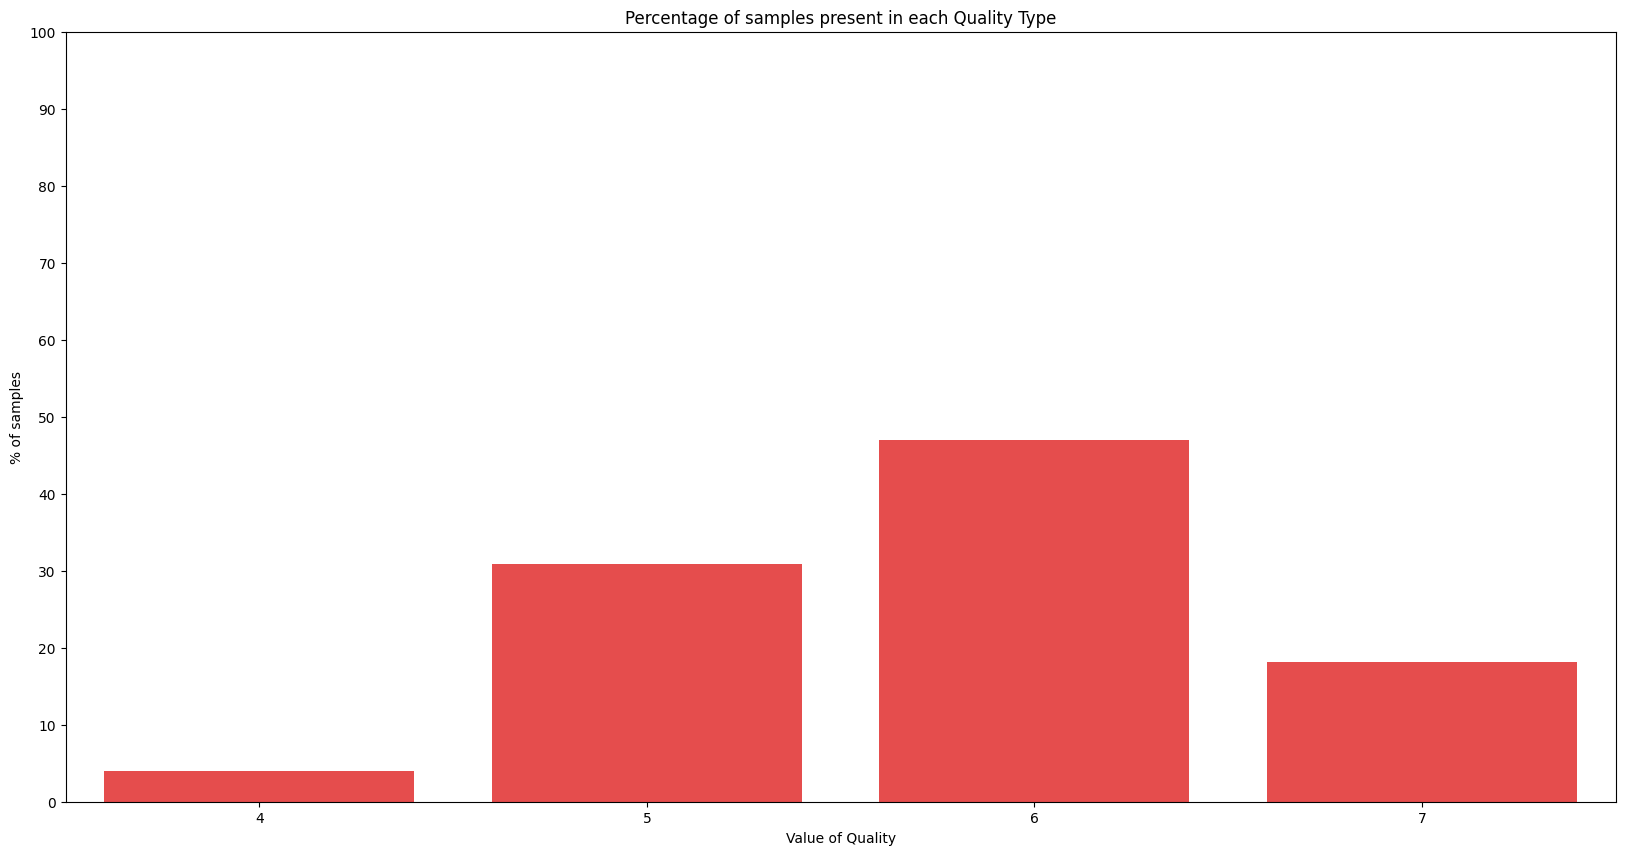

In [20]:
sns.barplot(x="quality",
            y="% of samples",
            data=df_qualityType,
            color="red",
            alpha=0.8)

plt.xlabel("Value of Quality")
plt.ylabel("% of samples")
plt.title("Percentage of samples present in each Quality Type")

plt.yticks(np.arange(0,101,10))

plt.show()

##Scatter plot

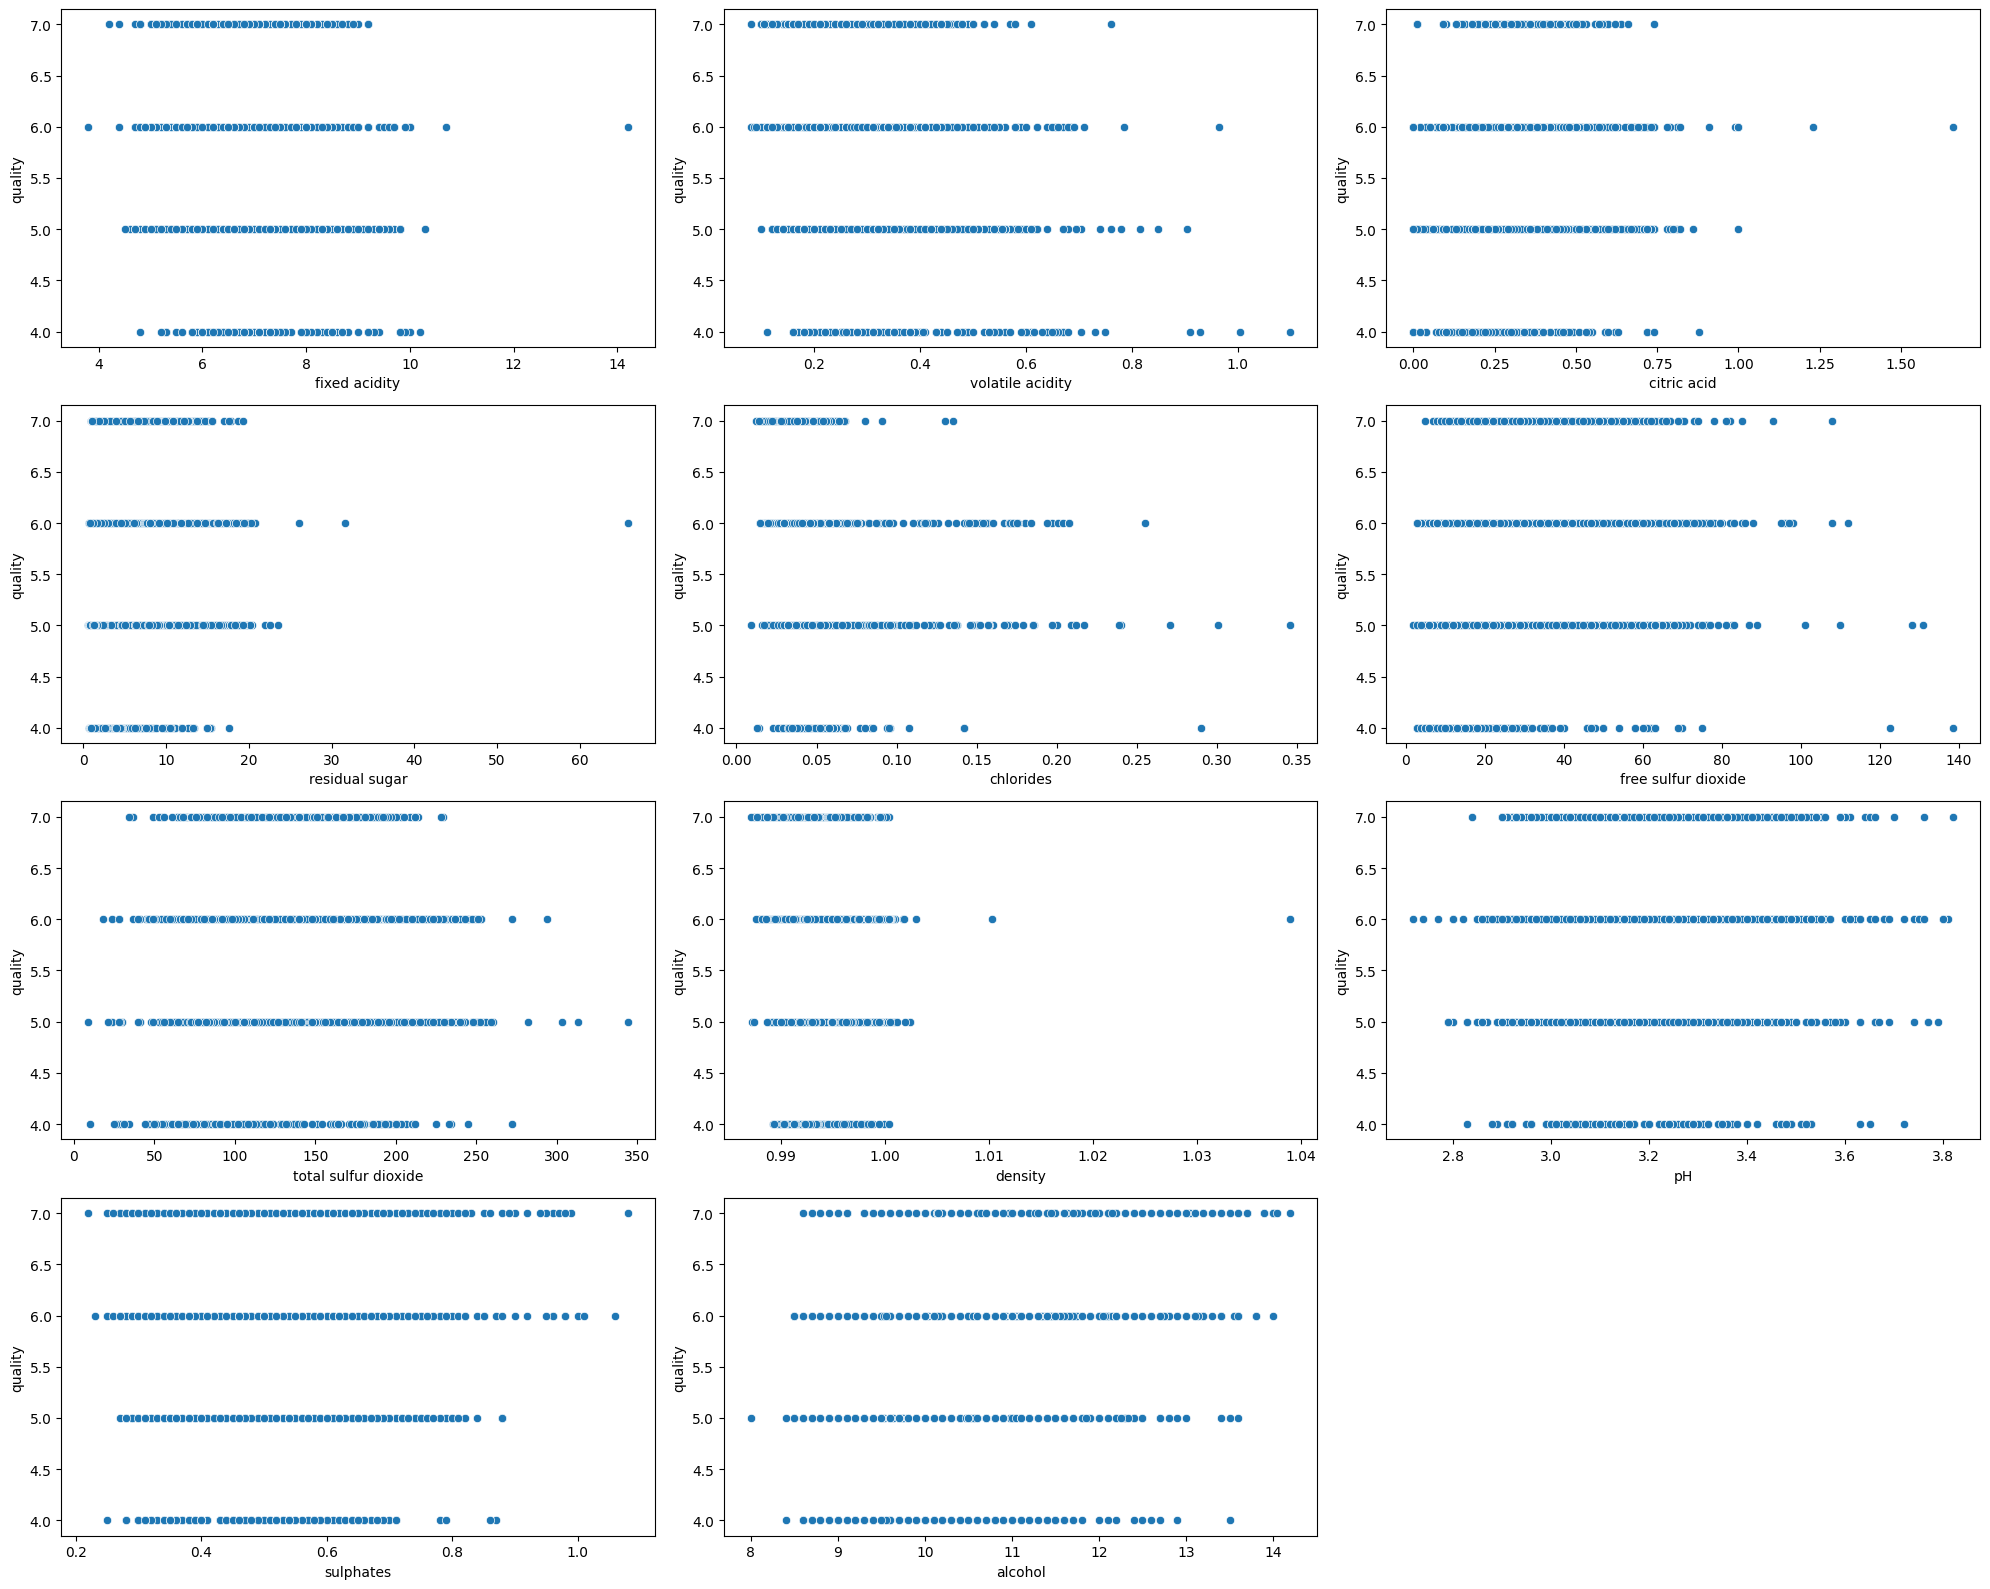

In [21]:
plt.figure(figsize=(20,16))
List=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
"total sulfur dioxide",
"density",
"pH",
"sulphates",
"alcohol",
]
j=0;
for i in List:
  j=j+1
  plt.subplot(4, 3, j)
  sns.scatterplot(x=i, y="quality", data=data)

plt.tight_layout()
plt.show()

##Pie Chart

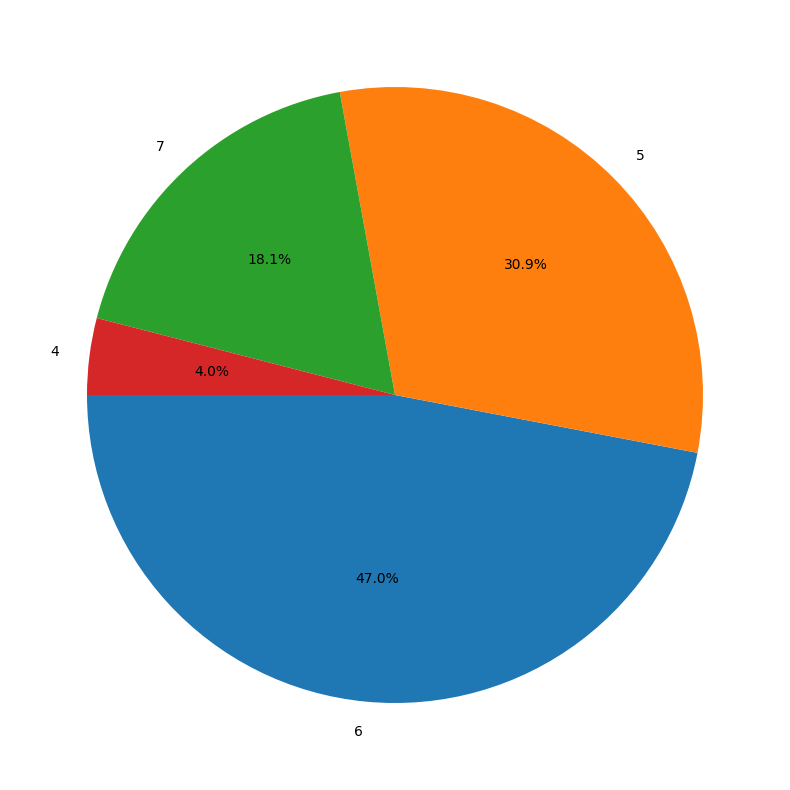

In [22]:
data["quality"].value_counts().plot(kind="pie",
                                       autopct='%1.1f%%',
                                       startangle=180)
plt.ylabel("")
plt.show()

##HeatMap

In [23]:
correlation_matrix = data.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
print(mask)

mask[np.triu_indices_from(mask)] = True
print(mask)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022253,0.303222,0.077768,0.015530,-0.057857,0.080511,0.255136,-0.426438,-0.014477,-0.097163,-0.110538
volatile acidity,-0.022253,1.000000,-0.164804,0.101767,0.086506,-0.106980,0.104820,0.070261,-0.046822,-0.016544,0.033039,-0.224555
citric acid,0.303222,-0.164804,1.000000,0.106796,0.135823,0.103914,0.128910,0.162586,-0.188686,0.054305,-0.080330,0.005756
residual sugar,0.077768,0.101767,0.106796,1.000000,0.070443,0.332303,0.416216,0.826449,-0.159145,-0.015767,-0.404181,-0.117752
chlorides,0.015530,0.086506,0.135823,0.070443,1.000000,0.108526,0.184757,0.242655,-0.082872,0.011316,-0.350274,-0.208667
free sulfur dioxide,-0.057857,-0.106980,0.103914,0.332303,0.108526,1.000000,0.616258,0.318636,-0.019008,0.028358,-0.274193,0.030153
total sulfur dioxide,0.080511,0.104820,0.128910,0.416216,0.184757,0.616258,1.000000,0.542638,0.009872,0.137063,-0.454736,-0.167747
density,0.255136,0.070261,0.162586,0.826449,0.242655,0.318636,0.542638,1.000000,-0.052494,0.082303,-0.755131,-0.322424
pH,-0.426438,-0.046822,-0.188686,-0.159145,-0.082872,-0.019008,0.009872,-0.052494,1.000000,0.138416,0.084561,0.117111
sulphates,-0.014477,-0.016544,0.054305,-0.015767,0.011316,0.028358,0.137063,0.082303,0.138416,1.000000,-0.017522,0.066446


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


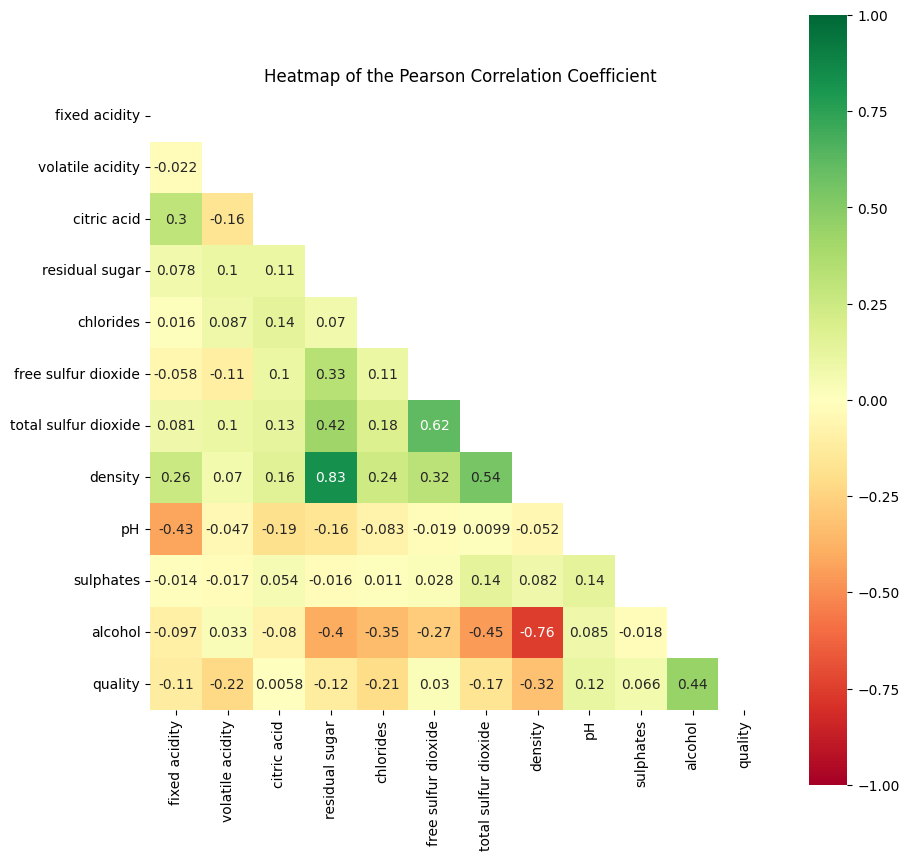

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,
            square=True,
            vmax=1.0, vmin=-1.0,
            cmap="RdYlGn",
            annot=True,
            mask=mask)

plt.title("Heatmap of the Pearson Correlation Coefficient")
plt.show()

##Line Plot

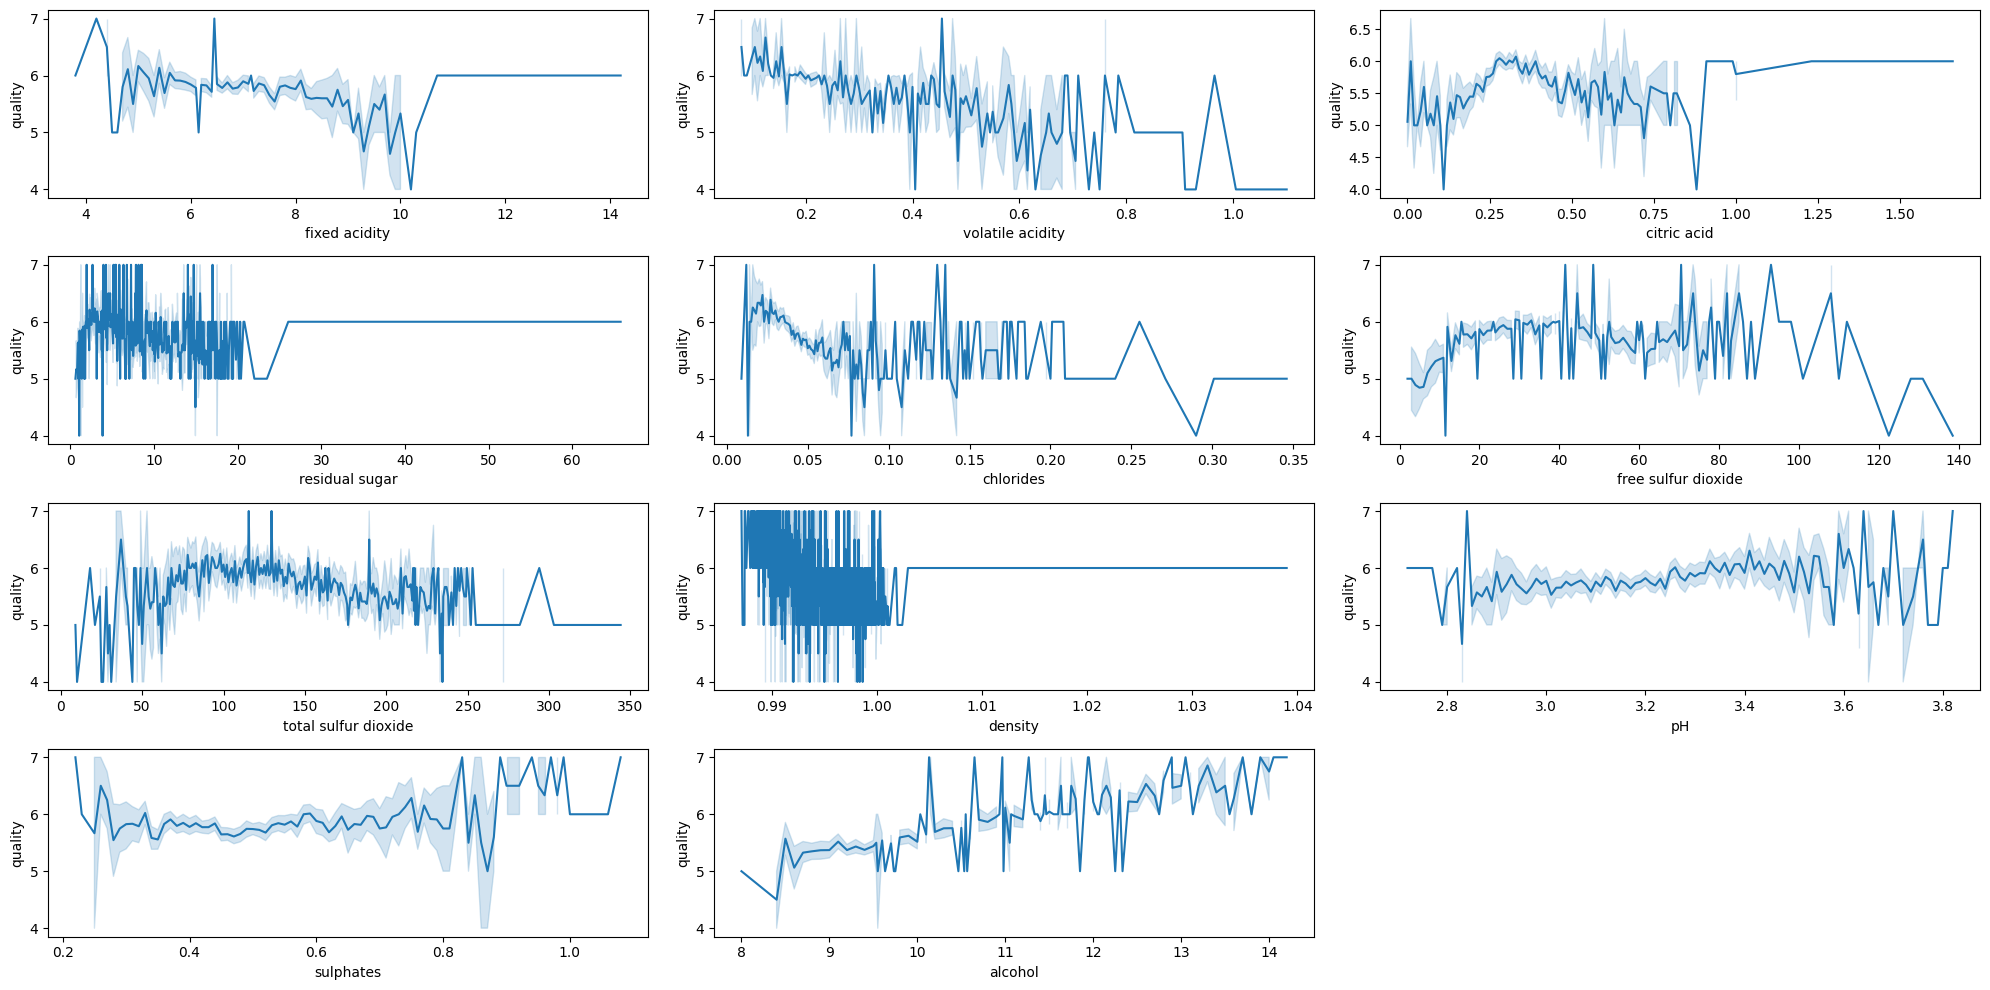

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

In [25]:

List=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
"total sulfur dioxide",
"density",
"pH",
"sulphates",
"alcohol",
]
j=0;
for i in List:
  j=j+1
  plt.subplot(4, 3, j)
  sns.lineplot(x=i, y="quality", data=data)

plt.tight_layout()
plt.show()
plt.figure(figsize=(20,16))